## IMPORTING DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading dataset

In [5]:
df=pd.read_csv('Advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Data Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.columns


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [56]:
# no. of unique values in particular column
df['Unnamed: 0'].nunique()

200

## Checkinh is there any null values in dataset

<Axes: >

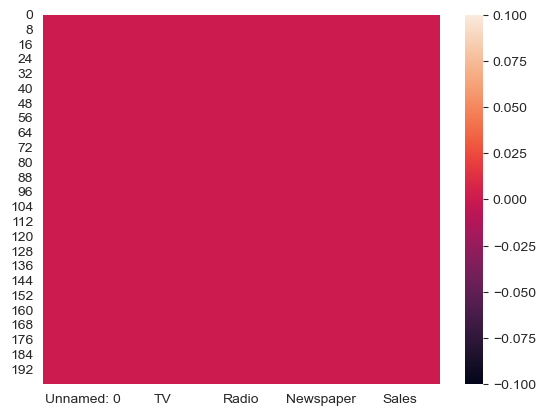

In [26]:
sns.heatmap(df.isnull())

## Plotting pairplot of specific columns

C:\Users\91985\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


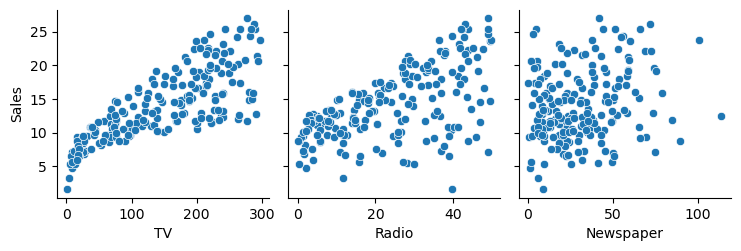

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

## Plotting histogram 

<Axes: xlabel='TV', ylabel='Count'>

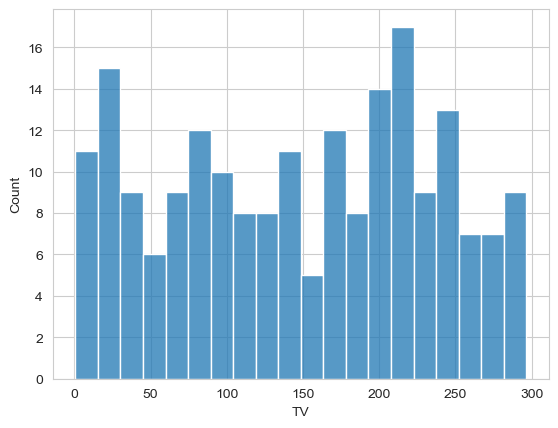

In [21]:
sns.set_style('whitegrid')
sns.histplot(x='TV',data=df,bins=20)

## Heatmap for checking correlation 

<Axes: >

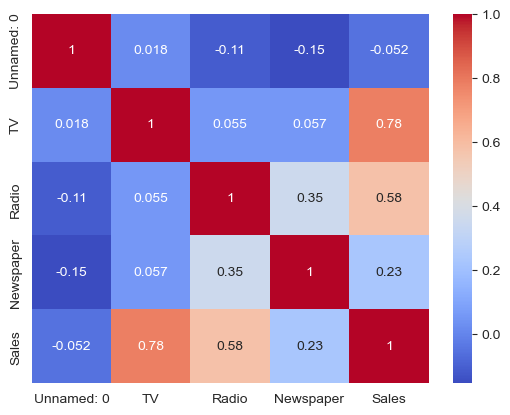

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)

In [41]:
X_train.head()

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4


## Training the model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [45]:
prediction=lr.predict(X_test)

In [46]:
prediction

array([17.2752476 , 16.74844593, 21.97674588, 24.59448907, 12.11768831,
       21.02033688, 10.15643252, 12.34380805, 11.70461016, 17.02091374,
       22.77376935, 15.3468411 ,  8.47830473, 14.9155752 , 18.61592987,
       18.78535771, 18.92262443, 14.411111  ,  9.65948532, 20.60497137,
       14.91294261, 17.84682569, 23.05099966,  7.74477655, 21.55734502,
       19.45793001, 13.93893979, 11.55855542, 18.37843109, 12.19352005,
       11.35032808,  9.91369153, 13.57335272, 15.18177818, 18.06379607,
        6.80705318, 14.14598886, 14.14649594, 14.1536933 , 10.69806825])

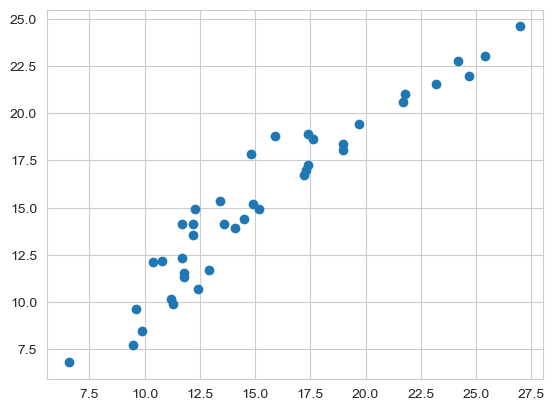

In [47]:
plt.scatter(y_test,prediction)

In [52]:
from sklearn import metrics

In [55]:
print(metrics.mean_absolute_error(y_test,prediction))
print(metrics.mean_squared_error(y_test,prediction))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

1.2114892606469108
2.217151072541898
1.4890100982001089
